In [ ]:
import pandas as pd
import os

In [ ]:
pwd

'C:\\Users\\mayas'

In [ ]:
data=pd.read_csv('card_transdata.csv')

In [ ]:
pd.options.display.max_columns=None

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.shape

(1000000, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [ ]:
data.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
data['ratio_to_median_purchase_price']=sc.fit_transform(pd.DataFrame(data['ratio_to_median_purchase_price']))

In [ ]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,0.043491,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,-0.189300,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,-0.498812,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,-0.522048,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,0.142373,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.duplicated().any()

False

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.shape

(1000000, 8)

In [ ]:
data['fraud'].value_counts()

0.0    912597
1.0     87403
Name: fraud, dtype: int64

In [ ]:
import seaborn as sns

C:\Users\mayas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud', ylabel='count'>

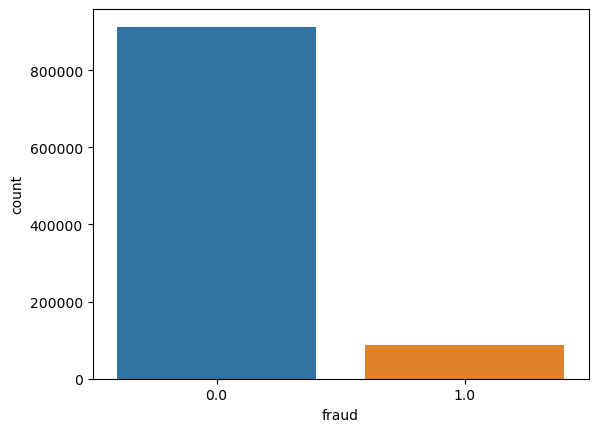

In [ ]:
sns.countplot(data['fraud'])

In [ ]:
X = data.drop('fraud',axis=1)
y = data['fraud']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,
                                                 random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

C:\Users\mayas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred1)

0.956965

In [ ]:
accuracy_score(y_test,y_pred1)

0.956965

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

0.8878841088674275

In [ ]:
precision_score(y_test,y_pred1)

0.8878841088674275

In [ ]:
recall_score(y_test,y_pred1)

0.5797741214240669

In [ ]:
recall_score(y_test,y_pred1)

0.5797741214240669

In [ ]:
f1_score(y_test,y_pred1)

0.7014878784725835

In [ ]:
f1_score(y_test,y_pred1)

0.7014878784725835

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred2 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

0.999985

In [ ]:
precision_score(y_test,y_pred2)

0.9999426671253296

In [ ]:
recall_score(y_test,y_pred2)

0.9998853408243995

In [ ]:
f1_score(y_test,y_pred2)

0.9999140031532177

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred3 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

0.99999

In [ ]:
precision_score(y_test,y_pred3)

1.0

In [ ]:
recall_score(y_test,y_pred3)

0.9998853408243995

In [ ]:
f1_score(y_test,y_pred3)

0.9999426671253296

In [ ]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(y_test,y_pred1)*100,
                     accuracy_score(y_test,y_pred2)*100,
                     accuracy_score(y_test,y_pred3)*100,

                    ]})

In [ ]:
final_data

,Models,ACC
0,LR,95.6965
1,DT,99.9985
2,RF,99.9990


C:\Users\mayas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

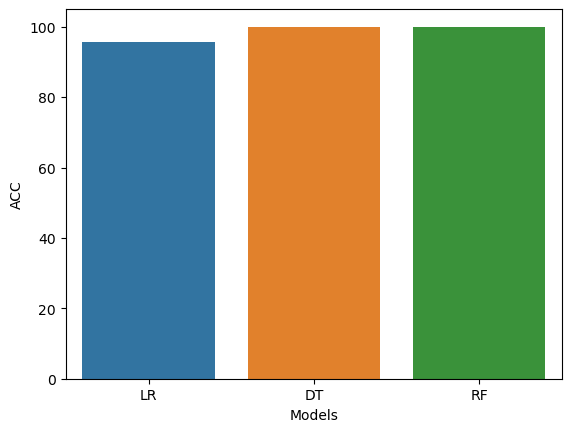

In [ ]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [ ]:
data.head(1)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.31114,0.043491,1.0,1.0,0.0,0.0,0.0


In [ ]:
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
import joblib

In [ ]:
joblib.dump(rf1,"credit_card_model")

['credit_card_model']

In [ ]:
model = joblib.load("credit_card_model")

In [ ]:
pred = model.predict([[1, 1, 1, 1, 1, 1, 1]])

C:\Users\mayas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred == 0:
    print("Normal Transcation")
else:
    print("Fraudulent Transcation")

Normal Transcation


In [ ]:
from tkinter import Tk, Label, Entry, Button, W, mainloop
import joblib
master = Tk()
master.title("Credit Card Fraud Detection System")


def show_entry_fields():
    distance_from_home=float(e1.get())
    distance_from_last_transaction=float(e2.get())
    ratio_to_median_purchase_price=float(e3.get())
    repeat_retailer=float(e4.get())
    used_chip=float(e5.get())
    used_pin_number=float(e6.get())
    online_order=float(e7.get())

    model = joblib.load('credit_card_model')
    y_pred = model.predict([[distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order]])
    list1=[distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order]

    result =""
    if y_pred ==0:

        result="Normal Transcation"
    else:

        result="Fraudulent Transcation"
    print("######################################")
    print("Credit Card Fraud Detection System", result)
    print("######################################")






    Label(master, text="Final Prediction from the model - credit card fraud detection").grid(row=10)
    Label(master, text=result).grid(row=11)




label = Label(master, text = "Credit Card Fraud Detection System", bg = "black", fg = "white",width = 30).grid(row=0,columnspan=2)


Label(master, text="Enter value of distance from home").grid(row=1)
Label(master, text="Enter value of distance from last transaction").grid(row=2)
Label(master, text="Enter value of ratio to median purchase price").grid(row=3)
Label(master, text="Enter value of repeat retailer").grid(row=4)
Label(master, text="Enter value of used chip").grid(row=5)
Label(master, text="Enter value of used pin number").grid(row=6)

Label(master, text="Enter value of online order").grid(row=7)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)

e7 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)

Button(master, text='Predict', command=show_entry_fields).grid(row=10, column=1, sticky=W, pady=4)

mainloop( )


C:\Users\mayas\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


######################################
Credit Card Fraud Detection System Fraudulent Transcation
######################################
